<a href="https://colab.research.google.com/github/raisaurabh44/My_project/blob/main/KMeans_cricket_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv(r'/content/drive/MyDrive/Clustering/Cricket (2).csv', encoding='latin1')
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat,79.0,245.075949,74.211716,128.00,188.000,232.00,281.500,463.00
Inns,79.0,230.544304,70.321022,127.00,177.000,217.00,261.500,452.00
NO,79.0,30.037975,14.421710,4.00,17.500,29.00,40.000,70.00
Runs,79.0,7618.139241,2551.873313,5080.00,5759.000,6798.00,8739.500,18426.00
Ave,79.0,38.523291,5.919093,23.57,34.600,37.87,41.845,53.94
BF,79.0,9684.455696,3193.835825,5504.00,7393.500,9134.00,10976.000,21367.00
SR,79.0,79.295316,9.925307,60.57,73.725,77.73,85.180,117.00
100,79.0,11.556962,8.092014,0.00,6.000,10.00,15.500,49.00
50,79.0,46.443038,16.351701,23.00,34.500,42.00,54.000,96.00
0,79.0,13.253165,5.925755,3.00,9.000,13.00,16.000,34.00


In [ ]:
df.isna().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

We will divide span in 2 parts
1. To covert the span into year of experiance we divide the columns in 2 parts and then calculate it

In [ ]:
df[['start','end']]= df.Span.str.split('-',expand=True )
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  start   79 non-null     object 
 14  end     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [ ]:
df[['start','end']]= df[['start','end']].astype(int)
df['Exp']=df['end']-df['start']
df=df.drop(['start', 'end', 'Span'], axis=1)
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133*,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96*,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120*,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
df['HS'].nunique()

62

In [ ]:
df['HS'].unique()

array(['200*', '169', '164', '189', '144', '137*', '139', '183', '153',
       '161*', '141*', '172', '183*', '153*', '162*', '145', '215', '194',
       '150', '152*', '132*', '173', '219', '175', '124', '134*', '130',
       '120*', '131*', '119*', '159', '102', '145*', '141', '108*',
       '188*', '143', '189*', '142*', '139*', '127*', '122', '174*',
       '181*', '166', '121', '140*', '124*', '113*', '185*', '154',
       '116*', '112', '237*', '109*', '264', '119', '144*', '150*',
       '133*', '96*', '156'], dtype=object)

In [ ]:
df[['HS', 'extra']] = df['HS'].str.split('*', expand=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
 13  extra   41 non-null     object 
dtypes: float64(2), int64(9), object(3)
memory usage: 8.8+ KB


In [ ]:
df['HS']=df['HS'].astype(int)
df=df.drop(['extra'], axis=1)
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int64  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [ ]:
# dropping playersfield
df_drop=df.copy()
player= df_drop.pop('Player')
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
#lets now rescale data
import sklearn
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
df_scal=scal.fit_transform(df_drop)
df_scal

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [ ]:
df1=pd.DataFrame(df_scal, columns=['Mat',	'Inns','NO','Runs','HS',	'Ave',	'BF',	'SR'	,'1df100',	'50',	'0',	'Exp'])

In [ ]:
df1

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,1df100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


<Axes: >

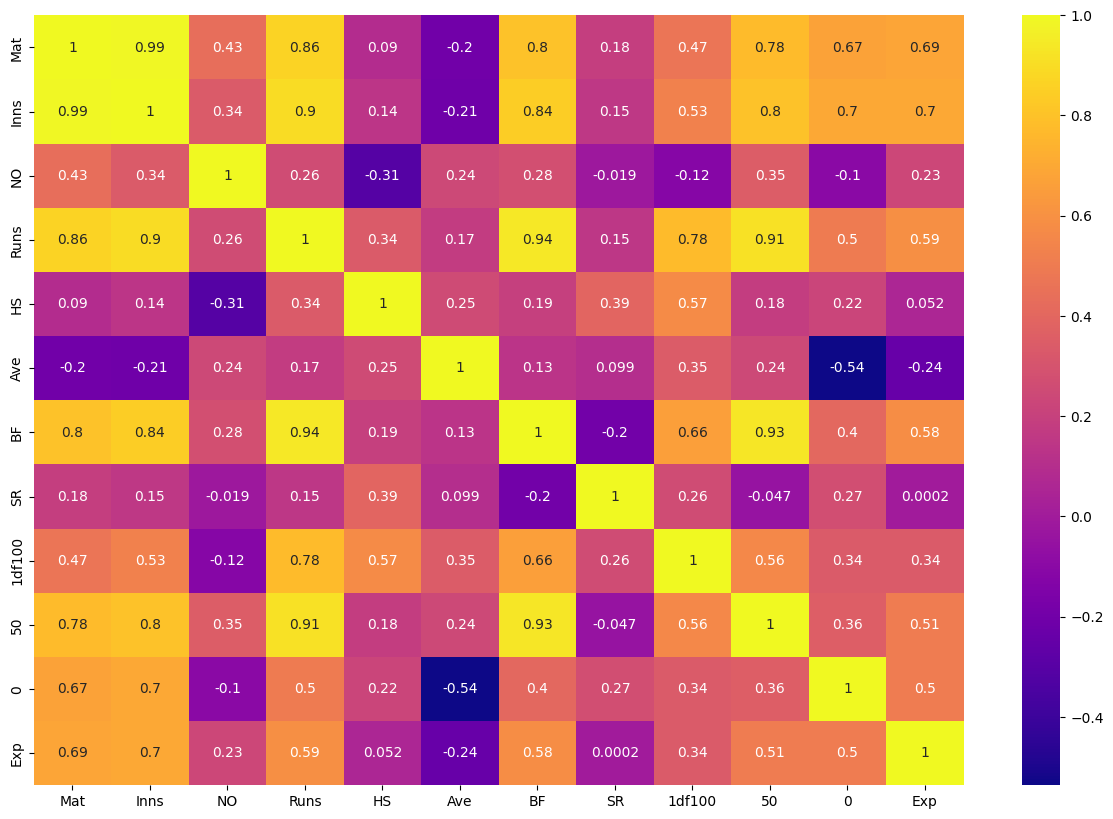

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True , cmap='plasma')

In [ ]:
df1.shape

(79, 12)

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

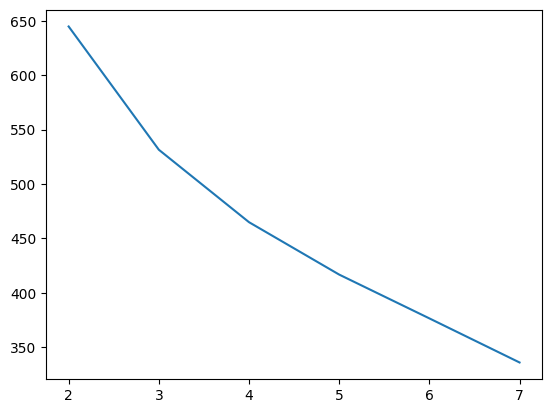

In [ ]:
# Elbow curve method to find the ideal number of cluster
clusters = list(range(2,8))
ssd=[]# sum of squared distance
for num_clusters in clusters:
  model=KMeans(n_clusters=num_clusters, max_iter=150, random_state= 50)
  model.fit(df1)
  ssd.append(model.inertia_)
plt.plot(clusters,ssd)

In [ ]:
#KMeans with k=4 clusters
clusters = KMeans(n_clusters=4, max_iter=150, random_state=15)
clusters.fit(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=150, n_clusters=4, random_state=15)

In [ ]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 0, 3, 0, 2, 3, 2,
       2, 2, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['clusters_ID']=clusters.labels_
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,clusters_ID
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,0
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,0
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,0
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,0


In [ ]:
## Number of players in each cluster
df.clusters_ID.value_counts(ascending=True)

1     9
3    11
2    27
0    32
Name: clusters_ID, dtype: int64

In [ ]:
df[df['clusters_ID']==0]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,clusters_ID
29,MJ Clarke (AUS),245,223,44,7981,130,44.58,10104,78.98,8,58,10,12,0
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,0
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,0
40,A Flower (ZIM),213,208,16,6786,145,35.34,9097,74.59,4,55,13,11,0
46,LRPL Taylor (NZ),190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,0
47,RB Richardson (WI),224,217,30,6248,122,33.41,9801,63.74,5,44,8,13,0
48,WU Tharanga (Asia/SL),204,193,14,6140,174,34.30,8183,75.03,14,34,15,12,0
51,DM Jones (AUS),164,161,25,6068,145,44.61,8362,72.56,7,46,6,10,0
52,DC Boon (AUS),181,177,16,5964,122,37.04,9157,65.13,5,37,6,11,0
53,JN Rhodes (SA),245,220,51,5935,121,35.11,7336,80.90,2,33,12,11,0
